In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data
data_url = 'https://www.dol.gov/sites/dolgov/files/ETA/oflc/pdfs/PERM_Disclosure_Data_FY2023_Q4.xlsx'
df = pd.read_excel(data_url)

In [12]:
# Add extra data
df['DECISION_TIME'] = df['DECISION_DATE'] - df['RECEIVED_DATE']

In [13]:
# Filter the appeal case, assuming that the audit case is the case that has a decision time of more than 365 days
days_appeal = 20*30
days_audit = days_appeal * 0.8
df_audit = df[df['DECISION_TIME'] > pd.Timedelta(days=days_audit)]
df_audit = df_audit[df_audit['DECISION_TIME'] < pd.Timedelta(days=days_appeal*1.2)]
df_audit = df_audit[~df_audit['CASE_STATUS'].isin(['Certified-Expired', 'Withdrawn'])]
df_audit

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,REFILE,ORIG_FILE_DATE,PREVIOUS_SWA_CASE_NUMBER_STATE,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_ADDRESS_1,...,FOREIGN_WORKER_EXP_WITH_EMPL,FOREIGN_WORKER_EMPL_PAY_FOR_ED,FOREIGN_WORKER_CURR_EMPLOYED,EMPLOYER_COMPLETED_APPLICATION,PREPARER_NAME,PREPARER_TITLE,PREPARER_EMAIL,EMP_INFO_DECL_NAME,EMP_DECL_TITLE,DECISION_TIME
692,A-21025-45354,Denied,2021-02-26,2022-10-03,N,NaT,NaN,N,"Stoughton Trailers, LLC",416 S. Academy St.,...,NaN,N,N,N,JOAQUIN ROSALES ARAMBURU,ATTORNEY,CASEMANAGER@AMERIGOLEGAL.COM,TODD ROLLER,TALENT ACQUISITION MANAGER,584 days
693,A-21025-45403,Denied,2021-02-26,2022-10-03,N,NaT,NaN,N,"Stoughton Trailers, LLC",416 S. Academy St.,...,NaN,N,N,N,JOAQUIN ROSALES ARAMBURU,ATTORNEY,CASEMANAGER@AMERIGOLEGAL.COM,TODD ROLLER,TALENT ACQUISITION MANAGER,584 days
1480,A-21106-75277,Denied,2021-05-04,2022-10-05,N,NaT,NaN,N,GOOGLE LLC,1600 AMPHITHEATRE PARKWAY,...,N,N,Y,N,Faraz Qaisrani,Associate Attorney,GoogleDOL@balglobal.com,Victoria Cheng,Global Mobility Immigration,519 days
2723,A-21070-60921,Denied,2021-05-06,2022-10-07,N,NaT,NaN,N,DTCP USA LLC,2735 Sand Hill Road,...,N,N,Y,N,Hilla R NATTIV,Attorney,nattiv@bayareaimmigration.com,Jack YOUNG,Head of Ventures,519 days
2744,A-21141-90525,Denied,2021-05-21,2022-10-07,N,NaT,NaN,N,MedCapital Solutions LLC,"714 West Olympic Boulevard,",...,N,N,N,N,NATHAN K WEI,ATTORNEY,NATHAN@SGWLAWYERS.COM,JOHN EMRANI,MANAGER,504 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116336,A-22110-43558,Denied,2022-04-20,2023-09-29,N,NaT,NaN,N,ARCHWAY LAWN AND LANDSCAPING,8250 VETERANS MEMORIAL PKWY,...,NaN,N,N,N,Jessie Chappell,Representative,Jessie@cgimmigrationlaw.com,BJ Brownlee,Supervisor,527 days
116337,A-22110-43569,Denied,2022-04-20,2023-09-29,N,NaT,NaN,N,ARCHWAY LAWN AND LANDSCAPING,8250 VETERANS MEMORIAL PKWY,...,NaN,N,N,N,Jessie Chappell,Representative,Jessie@cgimmigrationlaw.com,BJ Brownlee,Supervisor,527 days
116338,A-22110-43575,Denied,2022-04-20,2023-09-29,N,NaT,NaN,N,ARCHWAY LAWN AND LANDSCAPING,8250 VETERANS MEMORIAL PKWY,...,NaN,N,N,N,Jessie Chappell,Representative,Jessie@cgimmigrationlaw.com,BJ Brownlee,Supervisor,527 days
116339,A-22110-43580,Denied,2022-04-20,2023-09-29,N,NaT,NaN,N,ARCHWAY LAWN AND LANDSCAPING,8250 VETERANS MEMORIAL PKWY,...,NaN,N,N,N,Jessie Chappell,Representative,Jessie@cgimmigrationlaw.com,BJ Brownlee,Supervisor,527 days


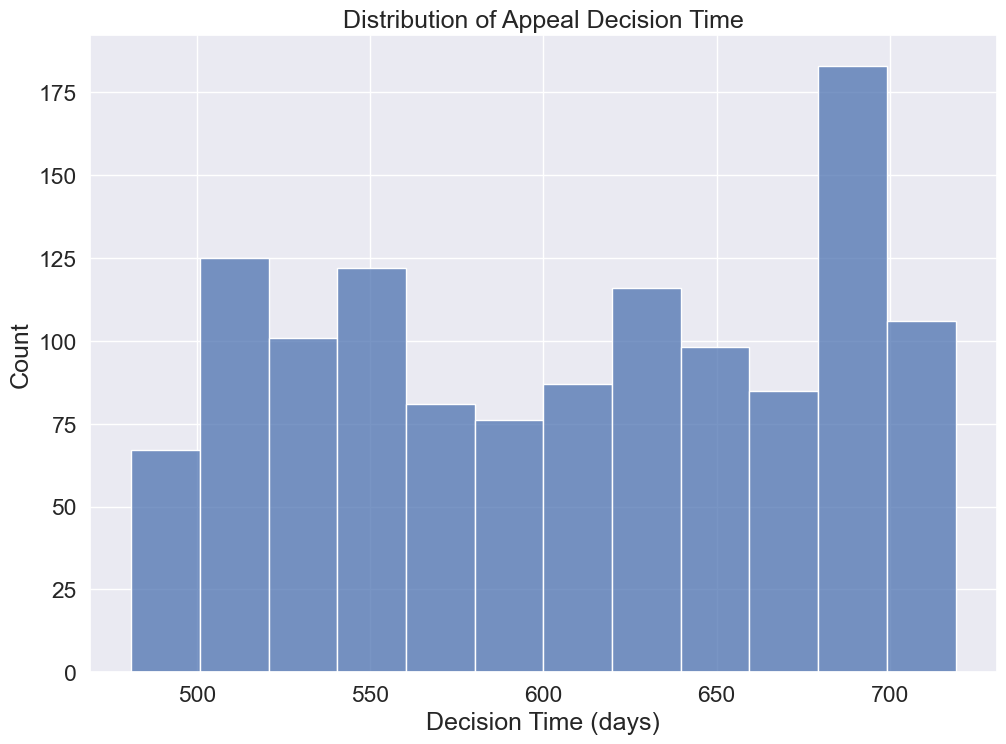

In [14]:
# Visualise the histogram distribution audt decision time
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.5)
ax = sns.histplot(x=df_audit['DECISION_TIME'].dt.days)
ax.set(xlabel='Decision Time (days)', title='Distribution of Appeal Decision Time')
plt.show()

In [15]:
df_audit[['CASE_STATUS', 'DECISION_TIME']].groupby('CASE_STATUS').describe()

DECISION_TIME                               \
                    count                         mean   
CASE_STATUS                                              
Certified             406  630 days 12:39:00.886699504   
Denied                841  594 days 15:10:54.934601664   

                                                                               \
                                    std                min                25%   
CASE_STATUS                                                                     
Certified    62 days 06:09:57.796125149  482 days 00:00:00  579 days 06:00:00   
Denied       70 days 05:59:44.602376605  481 days 00:00:00  530 days 00:00:00   

                                                                      
                           50%                75%                max  
CASE_STATUS                                                           
Certified    640 days 00:00:00  680 days 00:00:00  719 days 00:00:00  
Denied       591 days 00:00:00  666 days 00:00:00  719 days 00:00:00

In [16]:
res = df_audit[['CASE_STATUS', 'DECISION_TIME']].groupby('CASE_STATUS').describe()['DECISION_TIME']['count']
#get approval rate
approval_rate = res['Certified'] / (res['Certified'] + res['Denied'])
print(f'Approval rate {approval_rate:.2%}')


Approval rate 32.56%


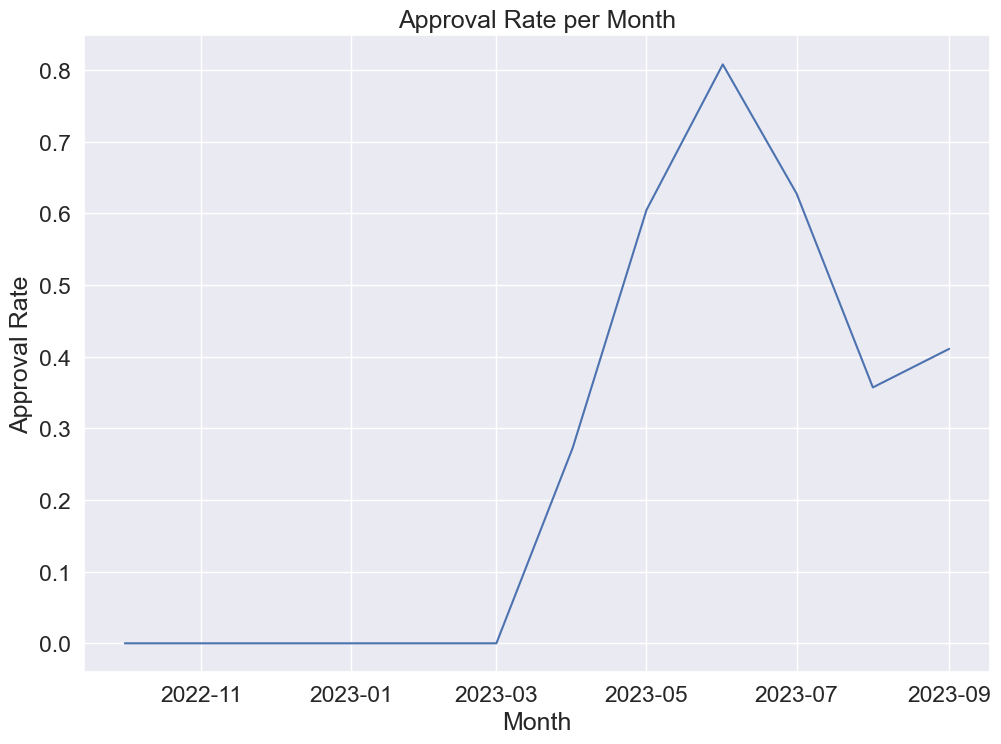

In [17]:
# Visualise the histogram distribution appeal per month
df_audit['DECISION_MONTH'] = df_audit['DECISION_DATE'].dt.month
df_audit['DECISION_YEAR'] = df_audit['DECISION_DATE'].dt.year
df_audit['DECISION_MONTH_YEAR'] = df_audit['DECISION_DATE'].dt.strftime('%Y-%m')
df_audit['DECISION_MONTH_YEAR'] = pd.to_datetime(df_audit['DECISION_MONTH_YEAR'])

# Get the approval rate per month
certified_count_per_month = df_audit[['CASE_STATUS', 'DECISION_MONTH_YEAR']][df_audit['CASE_STATUS'] == 'Certified'].groupby('DECISION_MONTH_YEAR').describe()['CASE_STATUS']['count'].rename('certified')
denied_count_per_month = df_audit[['CASE_STATUS', 'DECISION_MONTH_YEAR']][df_audit['CASE_STATUS'] == 'Denied'].groupby('DECISION_MONTH_YEAR').describe()['CASE_STATUS']['count'].rename('denied')

# Merge the approval rate per month
approval_rate_per_month = pd.merge(certified_count_per_month, denied_count_per_month, on='DECISION_MONTH_YEAR', how='outer')
approval_rate_per_month = approval_rate_per_month.fillna(0)

approval_rate_per_month['approval_rate'] = approval_rate_per_month['certified'] / (approval_rate_per_month['certified'] + approval_rate_per_month['denied'])
approval_rate_per_month = approval_rate_per_month.reset_index()
# Plot the approval rate per month
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.5)
ax = sns.lineplot(x=approval_rate_per_month['DECISION_MONTH_YEAR'], y=approval_rate_per_month['approval_rate'])
ax.set(xlabel='Month', ylabel='Approval Rate', title='Approval Rate per Month')
plt.show()

In [18]:
# Get the approval rate per month
denied_count_per_month

DECISION_MONTH_YEAR
2022-10-01     89
2022-11-01     49
2022-12-01     88
2023-01-01     37
2023-02-01    147
2023-03-01     60
2023-04-01     64
2023-05-01     49
2023-06-01     24
2023-07-01     51
2023-08-01     54
2023-09-01    129
Name: denied, dtype: object

In [19]:
certified_count_per_month

DECISION_MONTH_YEAR
2023-04-01     24
2023-05-01     75
2023-06-01    101
2023-07-01     86
2023-08-01     30
2023-09-01     90
Name: certified, dtype: object